In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family']='Gulim'

In [5]:
df=pd.read_csv('http://bit.ly/3RhoNho')

C:\Users\user\AppData\Local\Temp\ipykernel_9640\373930061.py:1: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('http://bit.ly/3RhoNho')


In [7]:
df=df.iloc[:,:-1]

In [11]:
new_df=df.발행년도.value_counts().reset_index()

In [13]:
new_df.columns=['발행년도','발행부수']


In [20]:
#년도 4자리만 사용하도록 하면서 4자리가 숫자가 아니거나 4자리로 변환했을 때 1945이전과 2023이후 데이터는 지우기
(int(new_df.발행년도[1][:4]) >= 1945) & (int(new_df.발행년도[1][:4]) <=2023)

True

In [24]:
remove_idx=[]
for idx, val in new_df.발행년도.items():
    try:
        result=int(val)
        if result<1945 or result>2024:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)

In [29]:
# 이상데이터 제거
new_df.drop(remove_idx,0,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9640\1234026819.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_df.drop(remove_idx,0,inplace=True)


KeyError: '[34, 37, 38, 41, 47, 51, 52, 54, 55, 58, 59, 60, 63, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 87, 89, 90, 91, 92, 93, 95, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 257, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 359, 360, 361, 362, 363, 364, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399] not found in axis'

In [35]:
new_df.발행년도 = new_df.발행년도.astype(int)

In [37]:
tidy_df=new_df.sort_values(by='발행년도')

In [40]:
count_by_year=tidy_df.set_index('발행년도')

C:\Users\user\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<function matplotlib.pyplot.show(close=None, block=None)>

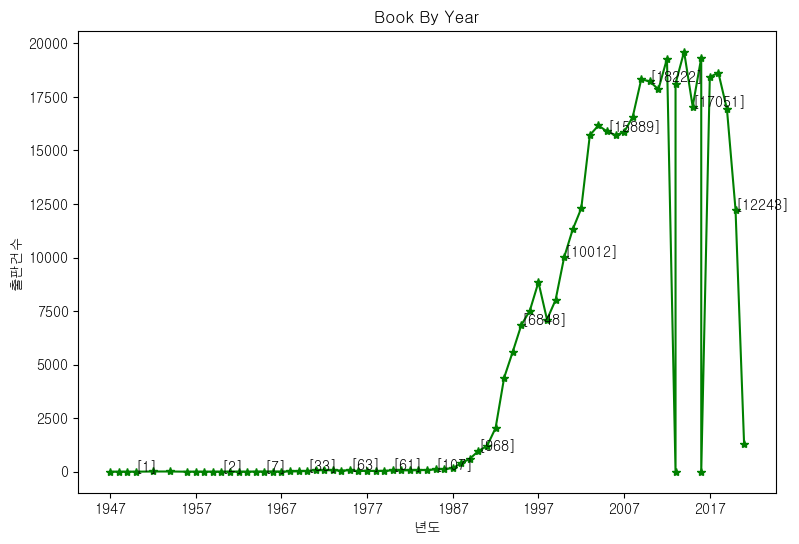

In [65]:
plt.figure(figsize=(9,6))
plt.plot(count_by_year,'*-g')
plt.title('Book By Year')
plt.xlabel('년도')
plt.ylabel('출판건수')
plt.xticks(range(1947,2023,10))
# plt.annotate('제일많이팔린곳',(2019,16926))
# plt.annotate('두번째',(2020,12243))
for idx,val in zip(count_by_year.index, count_by_year.values):
    if idx% 5==0:
        plt.annotate(val,(idx,val))
plt.show

In [80]:
new_df=df.주제분류번호.str[:1].value_counts().reset_index()

In [86]:
new_df=df.copy()

In [87]:
new_df.주제분류번호.fillna('미분류',inplace=True)

In [88]:
new_df=new_df.주제분류번호.str[:1].value_counts().reset_index()

In [89]:
new_df.columns=['주제분류번호','건수']

In [91]:
tidy_df=new_df.set_index('주제분류번호')

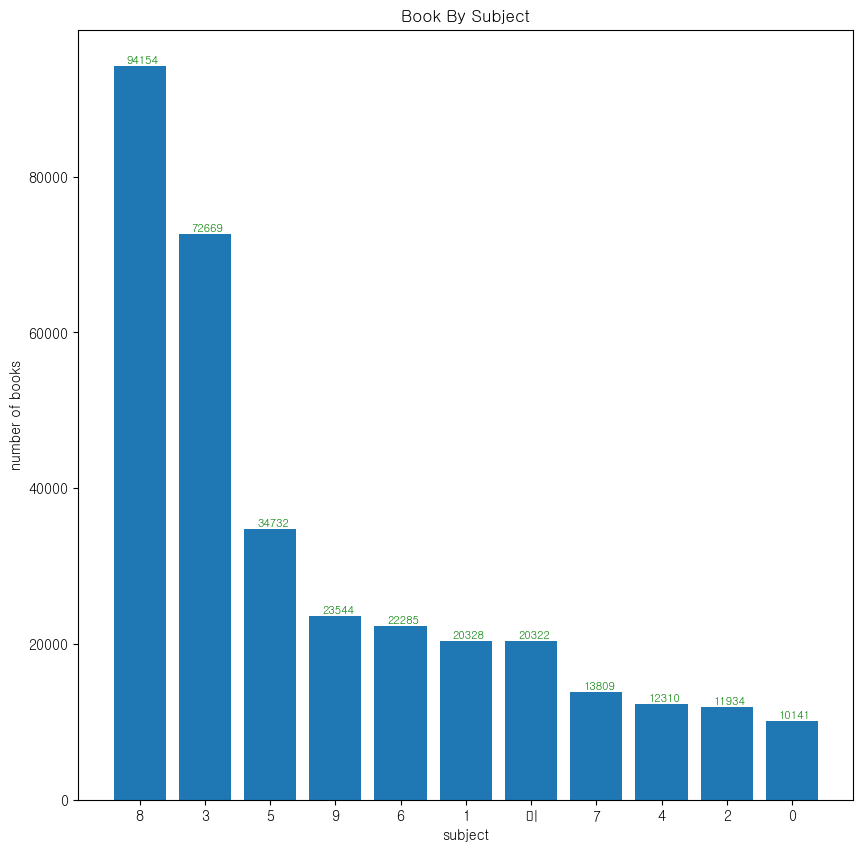

In [101]:
plt.figure(figsize=(10,10))
plt.bar(new_df.주제분류번호,new_df.건수)
plt.title('Book By Subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in zip(new_df.주제분류번호,new_df.건수):
    plt.annotate(val,(idx,val),xytext=(2,2),textcoords='offset points',ha='center',fontsize=8,color='green')
plt.show()

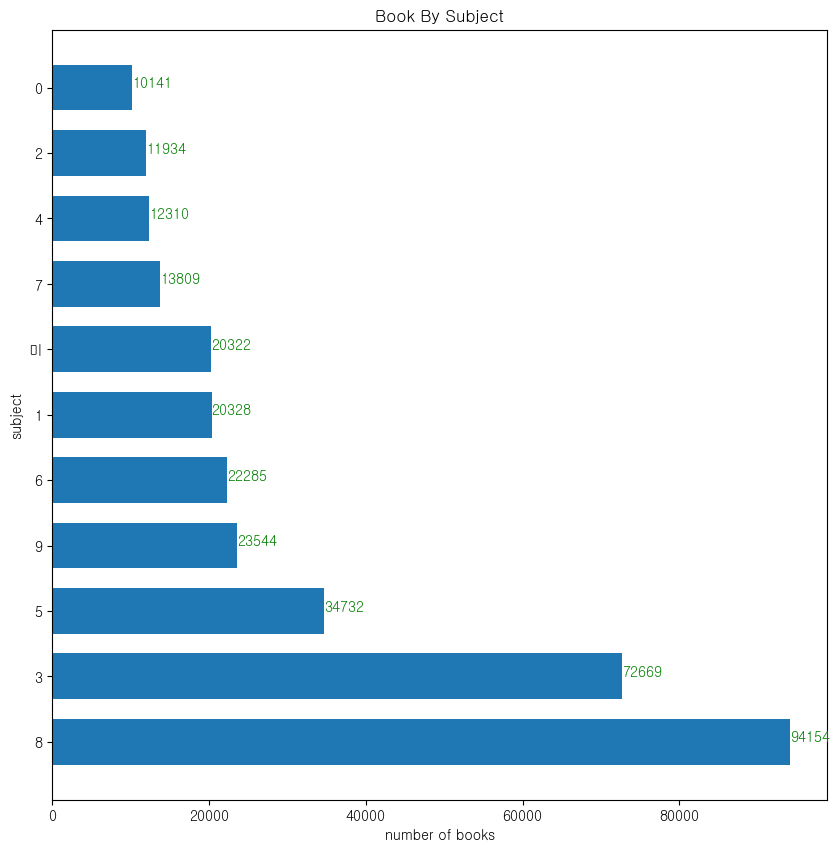

In [106]:
plt.figure(figsize=(10,10))
plt.barh(new_df.주제분류번호,new_df.건수,height=.7)
plt.title('Book By Subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in zip(new_df.주제분류번호,new_df.건수):
    plt.annotate(val,(val,idx), color='green')
plt.show()
plt.savefig('book_fig')

In [108]:
img=plt.imread('1.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '1.jpg'

In [109]:
img=img.compy()
pimg[:,:,2]=0

SyntaxError: invalid syntax (3764980943.py, line 2)

In [ ]:
plt.imshow(img1[:600,:800,:])

In [ ]:
book_subject=plt.imread

In [ ]:
fig,ax=plt.subplots()
ax.plot([1,4,9,16])
ax.set_title('simple lin graph')
ax.set_xlabel('x-label')
ax.set_ylabel('y-label')

In [ ]:
plt.rcParams['font.family']='Gulim'
plt.rcParams['font.size']=11

In [ ]:
#출판사별 발행부수 산점도 그리기


In [ ]:
df.groupby(['출판사','발행년도'])

In [ ]:
new_df=df.copy()

In [ ]:
new_df.loc[~new_df.출판사.isna(),:]

In [110]:
new_df=new_df['출판사','발행년도'].value_counts()

KeyError: ('출판사', '발행년도')

In [ ]:
remove_idx=[]
for idx, val, new_idx.발행년도.items():
    try:
        if int(val) < 1945 or int(val)>2023:
            remove_idx.append(idx)
        except:
            remove_idx.append(idx)

In [ ]:
new_df.drop(remove_idx,0,inplace=True)

In [ ]:
new_df=df.copy()

In [ ]:
new_df=new_df.loc[~new_df.출판사.isna(),:]
new_df=new_df.loc[~new_df.발행년도.isna(),:]

In [ ]:
#발행건수가 많은 상위 30개 출판사
top_30=new_df.출판사.value_counts()[:30].index

In [ ]:
new_df=new_df.loc[new_df.출판사.isin(top_30),:]

In [ ]:
new_df.index=np.arange(new_df.shape[0])

In [ ]:
remove_idx=[]
for idx, val, new_idx.발행년도.items():
    try:
        if int(val) < 2000 or int(val)>2023:
            remove_idx.append(idx)
        except:
            remove_idx.append(idx)

In [ ]:
new_df.drop(remove_idx,0,inplace=True)

In [ ]:
new_df=new_df.loc[new_df.발행년도.,:]

In [ ]:
fig, ax=plt.subplots(figsize=(10,9))
ax.scatter(new_df.발행년도, new_df.출판사,s=new_df.대출건수,linewidths=0.5,edgecolor='k',c=new_df.대출건수,
            alpha=.3,cmap='jet')

In [ ]:
new_df.발행년도.isna().sum()

In [130]:
line1=df.loc[df.출판사=='황금가지',:]
line2=df.loc[df.출판사=='비룡소',:]

In [131]:
line1[['발행년도','대출건수']]
line2[['발행년도','대출건수']]

,발행년도,대출건수
223,2020,0
394,2021,0
1479,2021,1
1906,2020,0
1915,2020,0
...,...,...
397401,1995,0
397503,1995,0
398633,1994,0
400292,2018,0


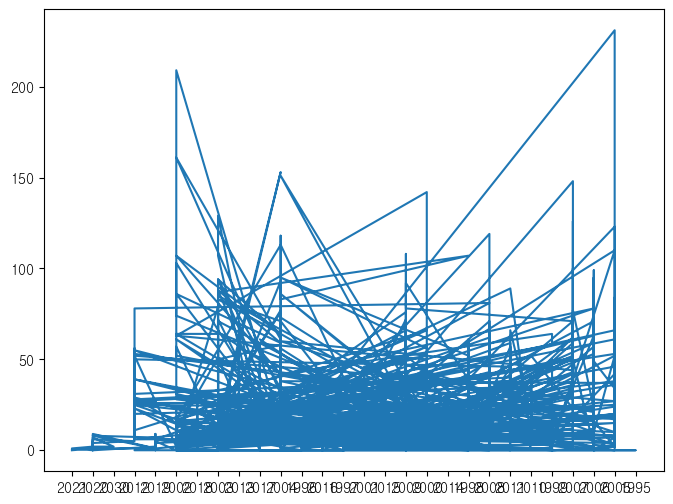

In [132]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1.발행년도, line1.대출건수)


In [133]:
year=np.arange(1990,2030)
year=np.array(year,dtype=str)

In [134]:
line1=line1.loc[line1.발행년도.isin(year),:]
line2=line2.loc[line2.발행년도.isin(year),:]

In [135]:
line1=line1[['발행년도','대출건수']]
line2=line2[['발행년도','대출건수']]

In [136]:
#순서 맞추기
line1=line1.발행년도.value_counts().sort_index()
line2=line2.발행년도.value_counts().sort_index()

In [142]:
target=list(set(line2.index)-set(line1.index))

In [144]:
# value가 더 많은 line2에서 빼는 경우
# line2.drop(list(set(line2.index)-set(line1.index)),0,inplace=True)

# value가 더 적은 line1을 추가하는 경우
for i in target:
    line1[i]=0
line1=line1.sort_index()
line1

1995      2
1996      8
1997     28
1998     42
1999     30
2000     38
2001     48
2002     57
2003     74
2004     64
2005     66
2006    111
2007     84
2008     78
2009     68
2010     22
2011     32
2012     41
2013     54
2014     29
2015     53
2016     42
2017     46
2018     17
2019     32
2020     30
2021      8
Name: 발행년도, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_9640\2169512691.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


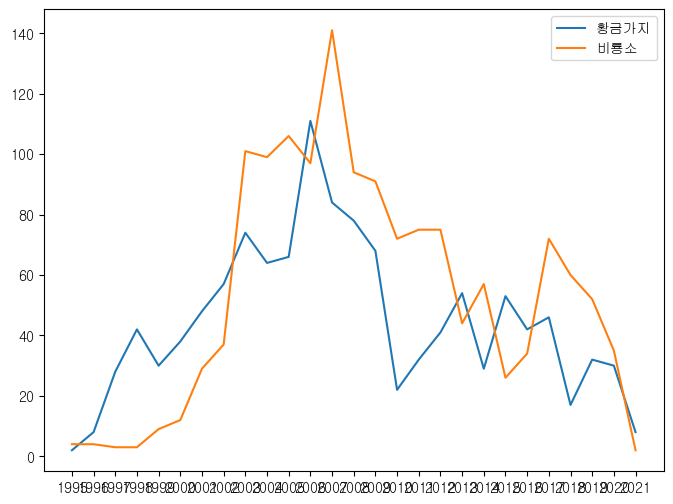

In [147]:
fig, ax=plt.subplots(figsize=(8,6))
ax.plot(line1,label='황금가지')
ax.plot(line2,label='비룡소')
ax.legend()
fig.show()

In [205]:
# 제일 많이 대출된 출판사
target=df.출판사.value_counts()[:5].index

In [206]:
new_df=df.copy()
remove_idx=[]
for idx, val in new_df.발행년도.itmes():
    try:
        if int(val) < 1990 or int(val) > 2023:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)
            
new_df.drop(remove_idx,0,inplace=True)
# df.loc[df.출판사==target[0]]

AttributeError: 'Series' object has no attribute 'itmes'

In [188]:
new_df=new_df.loc[new_df.출판사.isin(target),:]

In [189]:
new_df=new_df.groupby(['출판사','발행년도']).sum().대출건수.reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_9640\3768165971.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df=new_df.groupby(['출판사','발행년도']).sum().대출건수.reset_index()


In [213]:
year = new_df.발행년도.unique()

In [214]:
tmp=np.zeros((165,3))

In [215]:
new_df1=new_df.copy()

In [212]:

for i in year:
    for j in target:
        if sum(new_df1.발행년도==i &(new_df1.출판사==j)) < 1:
            tmp=pd.DataFrame({'출판사':[j],'발행년도':[i],'대출건수':[0]})
            new_df1=pd.concat([new_df,tmp])
            

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [220]:
fig, ax = plt.subplots(fig=(8,6))
for i in target:
    x=new_df1.loc[new_df1.출판사==i,'발행년도']
    y=new_df1.loc[new_df1.출판사==i,'대출건수']
    label=i
    ax.plot(x,y,label=label)
fig.legend(loc='upper left')
fig.show()

AttributeError: Figure.set() got an unexpected keyword argument 'fig'

In [164]:
new_df=new_df[['출판사','발행년도']].value_counts().reset_index()

In [165]:
new_df.rename(columns={0:'건수'},inplace=True)
new_df

,출판사,발행년도,건수
0,겨레,1995,1
1,예찬사,1997,1
2,예찬사,2004,1
3,예찬사,2003,1
4,예찬사,2002,1
...,...,...,...
78599,러브레터,2010,1
78600,러닝핏,2020,1
78601,러닝터틀,2017,1
78602,러닝앤코(LEARNING&CO),2018,1


In [178]:
new_df=new_df.loc[new_df.출판사.isin(target),:]

In [ ]:
new_df=new_df.groupby(['출판사','발행년도']).sum().대출건수

In [222]:
new_df1.pivot(index=['출판사'],columns=['발행년도'])

ValueError: Index contains duplicate entries, cannot reshape

In [225]:
date=np.datetime64('2023-01-01 00')+np.arange(1000)
val=np.random.randint(1,10,1000)

In [227]:
df=pd.DataFrame({'date':date,'usage':val})

In [232]:
df['day']=df.date.astype(str).str[:10]
df['hour']=df.date.astype(str).str[11:13]

In [234]:
df.drop(columns=['date'],inplace=True)

In [238]:
df=df[['day','hour','usage']]
df.pivot(index=['day'],columns=['hour'],values=['usage']).T

day         2023-01-01  2023-01-02  2023-01-03  2023-01-04  2023-01-05  \
      hour                                                               
usage 00           5.0         5.0         6.0         1.0         9.0   
      01           6.0         8.0         9.0         1.0         7.0   
      02           8.0         7.0         1.0         3.0         1.0   
      03           3.0         6.0         6.0         1.0         7.0   
      04           9.0         8.0         2.0         9.0         6.0   
      05           9.0         7.0         8.0         6.0         2.0   
      06           6.0         3.0         3.0         1.0         8.0   
      07           8.0         2.0         7.0         8.0         8.0   
      08           7.0         4.0         4.0         1.0         6.0   
      09           7.0         8.0         3.0         2.0         9.0   
      10           4.0         4.0         8.0         3.0         5.0   
      11           4.0         7.0         2.0         3.0         6.0   
      12           4.0         5.0         4.0         2.0         9.0   
      13           8.0         2.0         3.0         3.0         7.0   
      14           4.0         6.0         9.0         2.0         4.0   
      15           3.0         5.0         7.0         9.0         3.0   
      16           9.0         6.0         6.0         8.0         9.0   
      17           9.0         6.0         2.0         9.0         1.0   
      18           8.0         1.0         2.0         5.0         6.0   
      19           6.0         7.0         3.0         1.0         4.0   
      20           8.0         6.0         9.0         4.0         4.0   
      21           2.0         7.0         7.0         5.0         7.0   
      22           6.0         6.0         4.0         3.0         3.0   
      23           5.0         8.0         6.0         2.0         8.0   

day         2023-01-06  2023-01-07  2023-01-08  2023-01-09  2023-01-10  ...  \
      hour                                                              ...   
usage 00           2.0         7.0         2.0         3.0         6.0  ...   
      01           4.0         7.0         3.0         2.0         8.0  ...   
      02           5.0         5.0         2.0         2.0         4.0  ...   
      03           4.0         1.0         2.0         5.0         5.0  ...   
      04           2.0         1.0         9.0         6.0         3.0  ...   
      05           1.0         2.0         9.0         1.0         7.0  ...   
      06           1.0         4.0         9.0         3.0         1.0  ...   
      07           4.0         7.0         9.0         8.0         8.0  ...   
      08           2.0         5.0         3.0         8.0         5.0  ...   
      09           9.0         8.0         4.0         4.0         9.0  ...   
      10           6.0         7.0         8.0         6.0         2.0  ...   
      11           9.0         1.0         6.0         2.0         9.0  ...   
      12           1.0         2.0         1.0         4.0         2.0  ...   
      13           4.0         2.0         5.0         4.0         5.0  ...   
      14           8.0         1.0         7.0         6.0         3.0  ...   
      15           7.0         4.0         5.0         8.0         8.0  ...   
      16           3.0         2.0         7.0         5.0         3.0  ...   
      17           2.0         4.0         7.0         8.0         8.0  ...   
      18           5.0         7.0         9.0         9.0         2.0  ...   
      19           7.0         1.0         4.0         4.0         4.0  ...   
      20           7.0         1.0         7.0         1.0         3.0  ...   
      21           3.0         2.0         3.0         4.0         2.0  ...   
      22           9.0         1.0         8.0         4.0         8.0  ...   
      23           5.0         7.0         8.0         1.0         4.0  ...   

day         2023-02-

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(new_df1.groupby(['출판사']).sum().대출건수,labels=label)
fig.show()

In [254]:
import numpy as np
x=np.array([0,3,5,7])

In [255]:
(x-x.mean())/x.std()

array([-1.45010473, -0.29002095,  0.48336824,  1.25675744])

In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
StandardScaler().fit_transform(x.reshape(-1,1)).ravel()

array([-1.45010473, -0.29002095,  0.48336824,  1.25675744])

In [252]:
x.reshape(1,-1)

array([[0, 3, 5, 7]])

In [258]:
from scipy import stats

In [259]:
stats.zscore(x)

array([-1.45010473, -0.29002095,  0.48336824,  1.25675744])

In [264]:
x=np.random.uniform(0,1,10000)

In [265]:
import matplotlib.pyplot as plt

In [268]:
from scipy import stats

In [269]:
x=stats.chi(10000)

In [276]:
x_chi=np.random.chisquare(3,size=10000)
x_uni=np.random.uniform(0,1,size=10000)


(array([  2.,   6.,   8.,  13.,  23.,  25.,  54.,  86.,  99., 145., 207.,
        259., 305., 397., 435., 480., 558., 580., 630., 608., 630., 585.,
        587., 545., 465., 368., 336., 325., 267., 236., 165., 163., 117.,
         59.,  66.,  47.,  28.,  27.,  20.,  14.,  12.,   6.,   3.,   2.,
          4.,   0.,   1.,   0.,   1.,   1.]),
 array([1.65689623, 1.72476456, 1.79263289, 1.86050122, 1.92836955,
        1.99623788, 2.06410621, 2.13197454, 2.19984287, 2.2677112 ,
        2.33557953, 2.40344786, 2.47131619, 2.53918452, 2.60705285,
        2.67492118, 2.74278951, 2.81065784, 2.87852617, 2.9463945 ,
        3.01426283, 3.08213116, 3.14999949, 3.21786782, 3.28573615,
        3.35360448, 3.42147281, 3.48934114, 3.55720947, 3.6250778 ,
        3.69294613, 3.76081446, 3.82868279, 3.89655112, 3.96441945,
        4.03228778, 4.10015611, 4.16802444, 4.23589277, 4.3037611 ,
        4.37162943, 4.43949776, 4.50736609, 4.57523442, 4.64310276,
        4.71097109, 4.77883942, 4.84670775, 4.

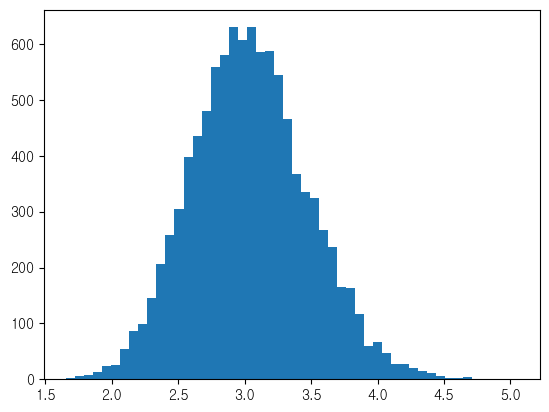

In [278]:
x_chi_sample=[]
for i in range(10000):
    result=np.random.choice(x_chi,30).mean()
    x_chi_sample.append(result)
plt.hist(x_chi_sample,bins=50)

(array([  1.,   0.,   0.,   1.,   0.,   1.,   0.,   2.,   0.,   6.,   6.,
          6.,  10.,   5.,  11.,  11.,   9.,  25.,  21.,  19.,  18.,  21.,
         33.,  49.,  49.,  50.,  77.,  71.,  86.,  89., 106., 116., 129.,
        135., 144., 164., 162., 180., 192., 167., 209., 225., 247., 250.,
        262., 267., 274., 247., 268., 282., 284., 282., 277., 254., 238.,
        254., 265., 242., 255., 277., 219., 206., 198., 182., 171., 160.,
        170., 149., 123., 125., 103.,  98., 118.,  83.,  77.,  65.,  59.,
         58.,  40.,  27.,  47.,  39.,  28.,  19.,  13.,  16.,  15.,  10.,
         15.,  11.,   3.,   2.,   6.,   4.,   0.,   1.,   2.,   3.,   0.,
          4.]),
 array([0.30750169, 0.31118635, 0.314871  , 0.31855566, 0.32224031,
        0.32592497, 0.32960962, 0.33329428, 0.33697893, 0.34066359,
        0.34434824, 0.3480329 , 0.35171755, 0.35540221, 0.35908686,
        0.36277152, 0.36645617, 0.37014083, 0.37382548, 0.37751014,
        0.38119479, 0.38487945, 0.3885641 , 0.

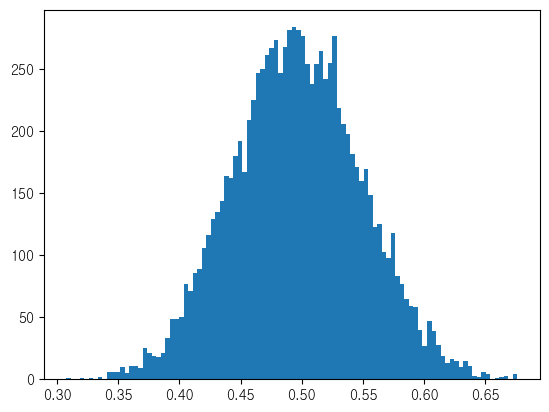

In [279]:
x_uni_sample=[]
for i in range(10000):
    result=np.random.choice(x_uni,30).mean()
    x_uni_sample.append(result)
plt.hist(x_uni_sample,bins=100)

In [280]:
from scipy import stats

In [292]:
male = np.random.randint(50,100,100)
female= np.random.randint(60,100,100)

In [293]:
male.mean(), female.mean()

(73.71, 78.44)

In [294]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=-2.533369391260701, pvalue=0.012072081276722721)

In [ ]:
from sklearn.datastes import load_iris
from sklearn.linear_model import LogistiRegression
from 